# Task 1: Student Score Prediction

## Objective
Build a model to predict students' exam scores based on their study hours

## Dataset
Student Performance Factors Dataset (Simulated for demonstration)

## Tasks:
1. Data cleaning and basic visualization
2. Split dataset into training and testing sets
3. Train linear regression model
4. Visualize predictions and evaluate performance
5. Bonus: Try polynomial regression and compare performance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Create synthetic dataset for demonstration
np.random.seed(42)
n_samples = 200

# Generate study hours (1-10 hours)
study_hours = np.random.uniform(1, 10, n_samples)

# Generate scores with some noise and non-linear relationship
base_score = 50 + 5 * study_hours + 0.5 * study_hours**2
noise = np.random.normal(0, 8, n_samples)
scores = np.clip(base_score + noise, 0, 100)

# Create DataFrame
data = pd.DataFrame({
    'study_hours': study_hours,
    'score': scores
})

print("Dataset Shape:", data.shape)
print("\nFirst 10 rows:")
print(data.head(10))
print("\nDataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Dataset Shape: (200, 2)

First 10 rows:
   study_hours       score
0     4.370861   75.966321
1     9.556429  100.000000
2     7.587945  100.000000
3     6.387926   96.627622
4     2.404168   79.837046
5     2.403951   68.699906
6     1.522753   49.242722
7     8.795585  100.000000
8     6.410035   94.796997
9     7.372653  100.000000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  200 non-null    float64
 1   score        200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None

Descriptive Statistics:
       study_hours       score
count   200.000000  200.000000
mean      5.356056   84.696768
std       2.654023   16.454296
min       1.049699   46.811730
25%       3.057242   68.906317
50%       5.450376   89.397075
75%       7.811737  100.000000
max       9.881982  100.000000


In [3]:
# Data Cleaning and Exploration
print("=== Data Cleaning ===")
print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for duplicates:")
print(f"Duplicate rows: {data.duplicated().sum()}")

print("\nChecking for outliers using IQR method:")
Q1 = data['score'].quantile(0.25)
Q3 = data['score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['score'] < lower_bound) | (data['score'] > upper_bound)]
print(f"Outliers found: {len(outliers)}")

# Remove outliers for better model performance
data_clean = data[(data['score'] >= lower_bound) & (data['score'] <= upper_bound)]
print(f"Data after removing outliers: {len(data_clean)} rows")

=== Data Cleaning ===

Checking for missing values:
study_hours    0
score          0
dtype: int64

Checking for duplicates:
Duplicate rows: 0

Checking for outliers using IQR method:
Outliers found: 0
Data after removing outliers: 200 rows


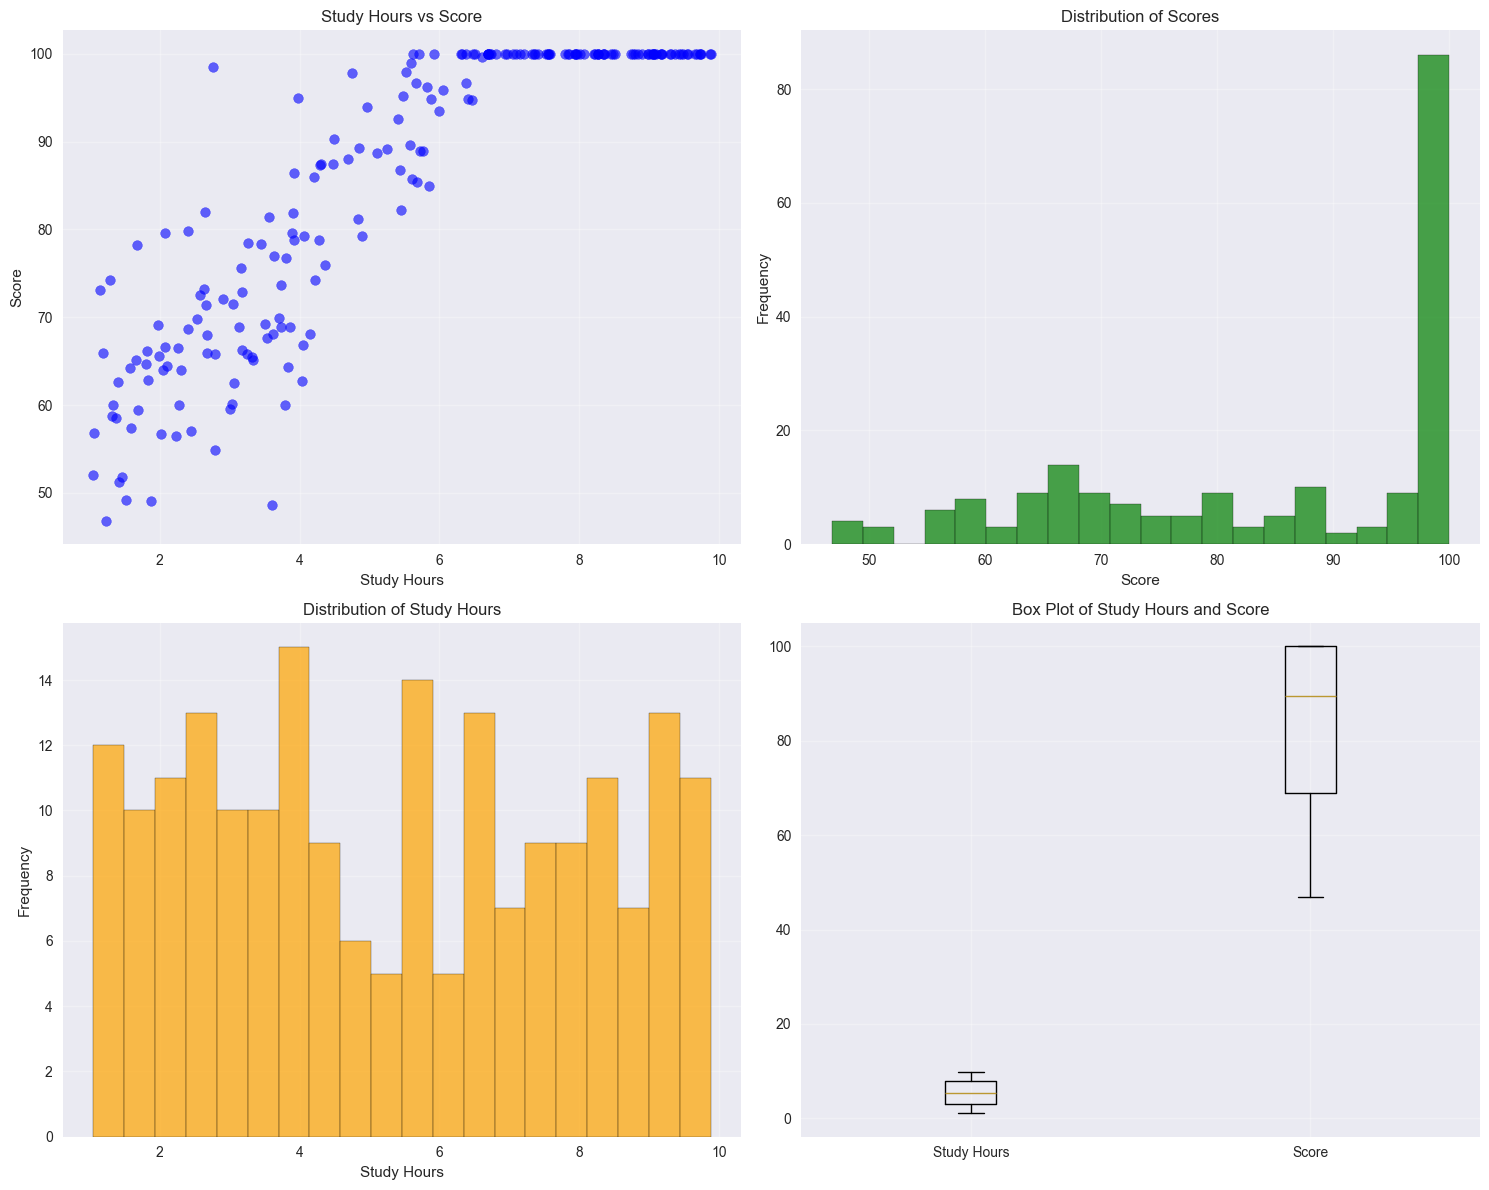


Correlation between study hours and score: 0.8851


In [4]:
# Basic Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of study hours vs score
axes[0, 0].scatter(data_clean['study_hours'], data_clean['score'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Study Hours')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Study Hours vs Score')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of scores
axes[0, 1].hist(data_clean['score'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Scores')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of study hours
axes[1, 0].hist(data_clean['study_hours'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Study Hours')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Study Hours')
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot
axes[1, 1].boxplot([data_clean['study_hours'], data_clean['score']], labels=['Study Hours', 'Score'])
axes[1, 1].set_title('Box Plot of Study Hours and Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = data_clean['study_hours'].corr(data_clean['score'])
print(f"\nCorrelation between study hours and score: {correlation:.4f}")

In [5]:
# Split dataset into training and testing sets
X = data_clean[['study_hours']]
y = data_clean['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set size: 160
Testing set size: 40
Training set shape: (160, 1)
Testing set shape: (40, 1)


In [6]:
# Train Linear Regression Model
print("=== Linear Regression Model ===")

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_train_pred_linear = linear_model.predict(X_train)

# Model coefficients
print(f"Linear Model Coefficients:")
print(f"Intercept: {linear_model.intercept_:.4f}")
print(f"Coefficient: {linear_model.coef_[0]:.4f}")
print(f"Equation: Score = {linear_model.intercept_:.4f} + {linear_model.coef_[0]:.4f} * Study_Hours")

# Evaluate model performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\nLinear Regression Performance:")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"Root Mean Squared Error: {rmse_linear:.4f}")
print(f"Mean Absolute Error: {mae_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")

=== Linear Regression Model ===
Linear Model Coefficients:
Intercept: 54.5242
Coefficient: 5.5942
Equation: Score = 54.5242 + 5.5942 * Study_Hours

Linear Regression Performance:
Mean Squared Error: 53.7149
Root Mean Squared Error: 7.3290
Mean Absolute Error: 5.8300
R² Score: 0.7662


In [7]:
# Bonus: Polynomial Regression
print("=== Polynomial Regression Model ===")

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)
y_train_pred_poly = poly_model.predict(X_train_poly)

# Model coefficients
print(f"Polynomial Model Coefficients:")
print(f"Intercept: {poly_model.intercept_:.4f}")
print(f"Coefficients: {poly_model.coef_}")

# Evaluate polynomial model performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Regression Performance:")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"Root Mean Squared Error: {rmse_poly:.4f}")
print(f"Mean Absolute Error: {mae_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

# Compare models
print(f"\n=== Model Comparison ===")
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Linear Regression': [mse_linear, rmse_linear, mae_linear, r2_linear],
    'Polynomial Regression': [mse_poly, rmse_poly, mae_poly, r2_poly]
})
print(comparison_df.round(4))

=== Polynomial Regression Model ===
Polynomial Model Coefficients:
Intercept: 39.9781
Coefficients: [12.53902883 -0.63456323]

Polynomial Regression Performance:
Mean Squared Error: 45.4548
Root Mean Squared Error: 6.7420
Mean Absolute Error: 4.6658
R² Score: 0.8022

=== Model Comparison ===
  Metric  Linear Regression  Polynomial Regression
0    MSE            53.7149                45.4548
1   RMSE             7.3290                 6.7420
2    MAE             5.8300                 4.6658
3     R²             0.7662                 0.8022


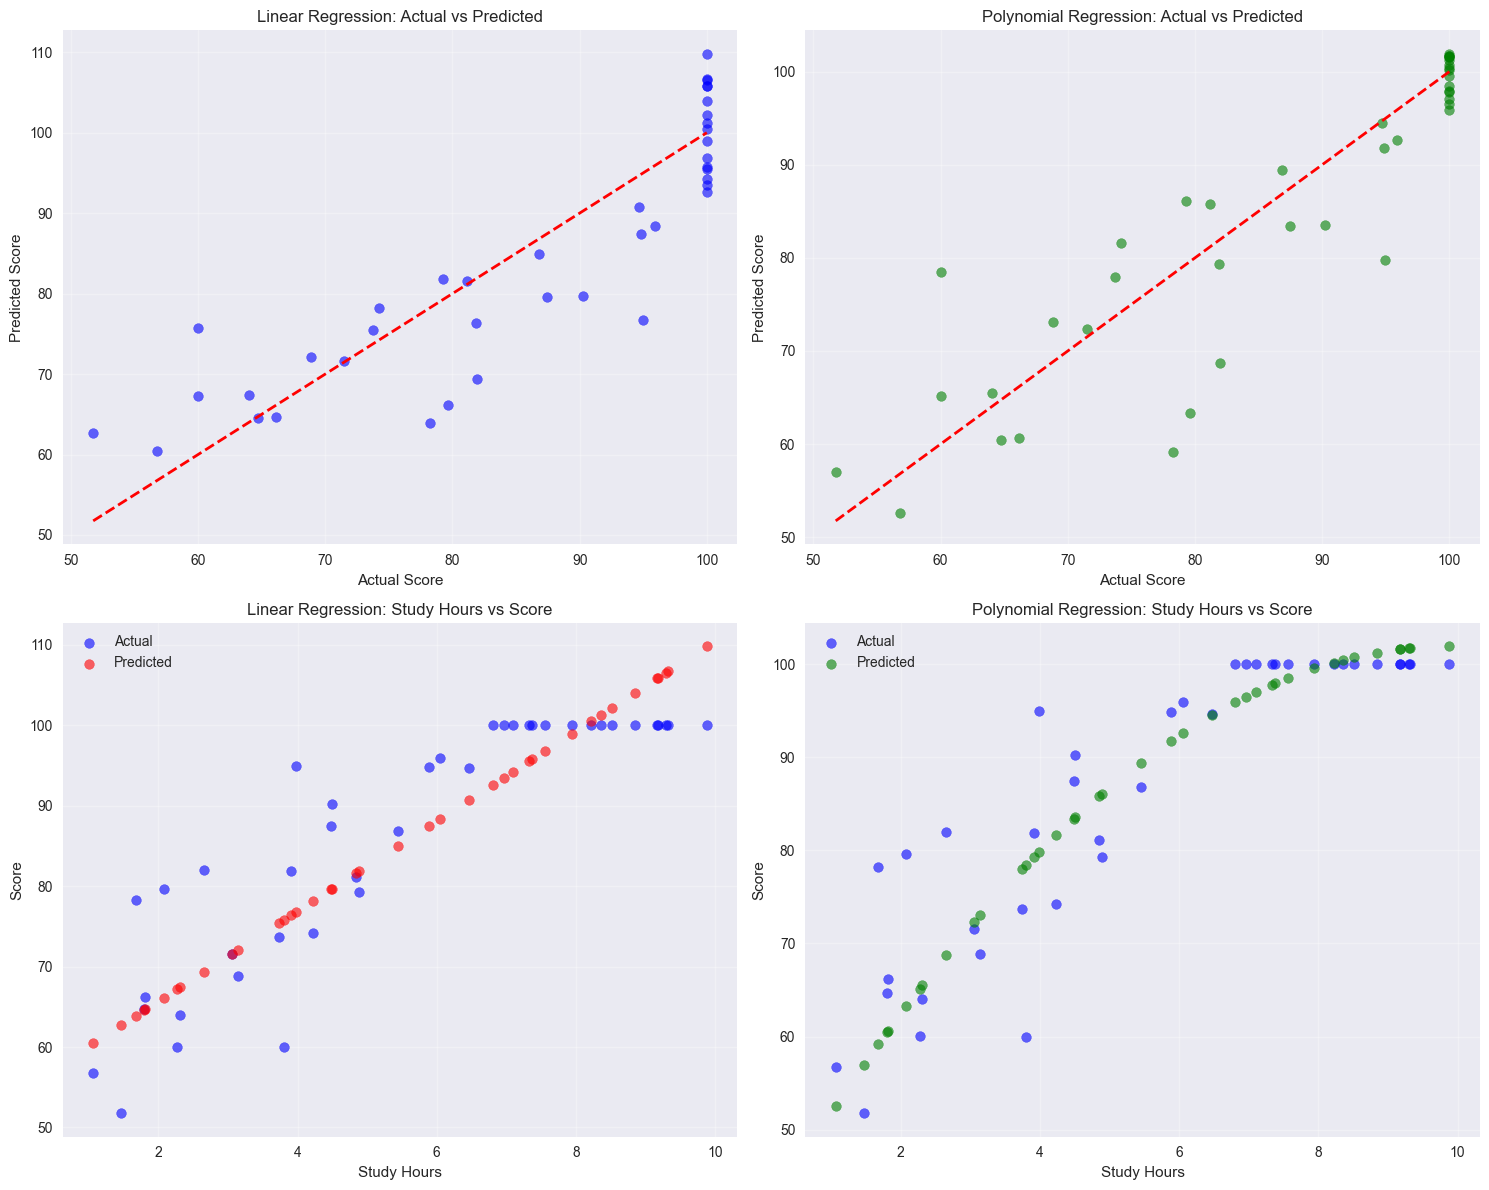

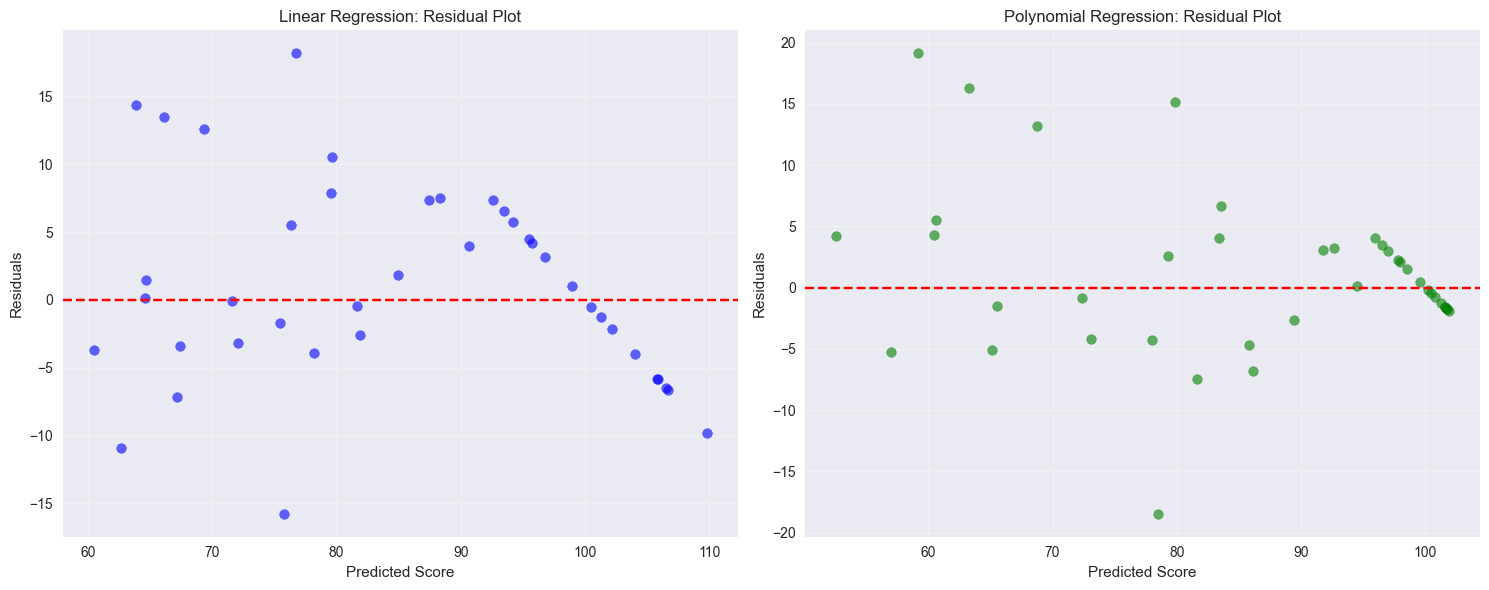

In [8]:
# Visualize predictions and evaluate model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Linear Regression: Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Score')
axes[0, 0].set_ylabel('Predicted Score')
axes[0, 0].set_title('Linear Regression: Actual vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

# 2. Polynomial Regression: Actual vs Predicted
axes[0, 1].scatter(y_test, y_pred_poly, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Score')
axes[0, 1].set_ylabel('Predicted Score')
axes[0, 1].set_title('Polynomial Regression: Actual vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# 3. Linear Regression: Study Hours vs Score with predictions
axes[1, 0].scatter(X_test, y_test, alpha=0.6, color='blue', label='Actual')
axes[1, 0].scatter(X_test, y_pred_linear, alpha=0.6, color='red', label='Predicted')
axes[1, 0].set_xlabel('Study Hours')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Linear Regression: Study Hours vs Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Polynomial Regression: Study Hours vs Score with predictions
axes[1, 1].scatter(X_test, y_test, alpha=0.6, color='blue', label='Actual')
axes[1, 1].scatter(X_test, y_pred_poly, alpha=0.6, color='green', label='Predicted')
axes[1, 1].set_xlabel('Study Hours')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Polynomial Regression: Study Hours vs Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear regression residuals
residuals_linear = y_test - y_pred_linear
axes[0].scatter(y_pred_linear, residuals_linear, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Score')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Linear Regression: Residual Plot')
axes[0].grid(True, alpha=0.3)

# Polynomial regression residuals
residuals_poly = y_test - y_pred_poly
axes[1].scatter(y_pred_poly, residuals_poly, alpha=0.6, color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Score')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Polynomial Regression: Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Model Summary and Conclusions
print("=== Model Summary and Conclusions ===")
print(f"\nBest Model: {'Polynomial Regression' if r2_poly > r2_linear else 'Linear Regression'}")
print(f"\nKey Findings:")
print(f"1. Correlation between study hours and score: {correlation:.4f}")
print(f"2. Linear Regression R²: {r2_linear:.4f}")
print(f"3. Polynomial Regression R²: {r2_poly:.4f}")
print(f"4. Improvement with polynomial: {((r2_poly - r2_linear) / r2_linear * 100):.2f}%")

print(f"\nModel Interpretation:")
if r2_poly > r2_linear:
    print("• Polynomial regression performs better, suggesting a non-linear relationship")
    print("• Study hours have a quadratic effect on scores")
else:
    print("• Linear regression is sufficient, suggesting a linear relationship")
    print("• Study hours have a direct linear effect on scores")

print(f"\nRecommendations:")
print("• Students should study more hours to improve scores")
print("• The relationship between study time and performance is significant")
print("• Consider other factors like study quality, breaks, etc.")

=== Model Summary and Conclusions ===

Best Model: Polynomial Regression

Key Findings:
1. Correlation between study hours and score: 0.8851
2. Linear Regression R²: 0.7662
3. Polynomial Regression R²: 0.8022
4. Improvement with polynomial: 4.69%

Model Interpretation:
• Polynomial regression performs better, suggesting a non-linear relationship
• Study hours have a quadratic effect on scores

Recommendations:
• Students should study more hours to improve scores
• The relationship between study time and performance is significant
• Consider other factors like study quality, breaks, etc.
